In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading data frame
df=pd.read_csv('../churn.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.groupby('Geography')['Exited'].sum()

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

In [11]:
df.groupby('Gender')['Exited'].sum()

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

In [12]:
df=df.drop(columns=['Geography','Gender'])

In [13]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

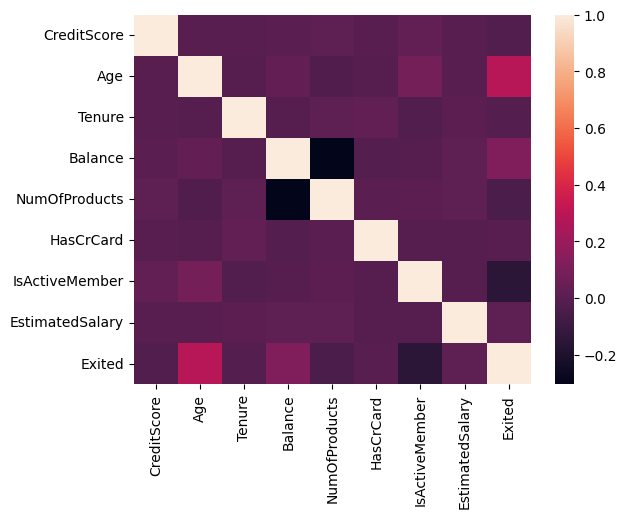

In [14]:
import seaborn as sns
sns.heatmap(df.corr())

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [16]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
sclaer=StandardScaler()

In [19]:
X=df.drop(columns=['Exited'],axis=1)

In [20]:
y=df['Exited']

In [21]:
X,y

(      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 0             619   42       2       0.00              1          1   
 1             608   41       1   83807.86              1          0   
 2             502   42       8  159660.80              3          1   
 3             699   39       1       0.00              2          0   
 4             850   43       2  125510.82              1          1   
 ...           ...  ...     ...        ...            ...        ...   
 9995          771   39       5       0.00              2          1   
 9996          516   35      10   57369.61              1          1   
 9997          709   36       7       0.00              1          0   
 9998          772   42       3   75075.31              2          1   
 9999          792   28       4  130142.79              1          1   
 
       IsActiveMember  EstimatedSalary  
 0                  1        101348.88  
 1                  1        112542.58  
 2         

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [23]:
X_train.shape,X_test.shape

((7000, 8), (3000, 8))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [25]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [26]:
X_test_scaled = scaler.transform(X_test)

In [27]:
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

In [29]:
def model_eval(model,X_train,y_train,X_test,y_test):
    model=model
    y_train_pred=model.predict(X_train)
    y_test_prd=model.predict(X_test)
    ac_train=accuracy_score(y_train_pred,y_train)
    ac_test=accuracy_score(y_test,y_test_prd)
    ps_train=precision_score(y_train,y_train_pred)
    ps_test=precision_score(y_test,y_test_prd)
    rc_train=recall_score(y_train,y_train_pred)
    rc_test=recall_score(y_test,y_test_prd)
    cm_train=confusion_matrix(y_train,y_train_pred)
    cm_test=confusion_matrix(y_test,y_test_prd)
    return ac_train,ac_test,ps_train,ps_test,rc_train,rc_test,cm_train,cm_test

In [30]:
model_eval(lr,X_train_scaled,y_train,X_test_scaled,y_test)

(0.8044285714285714,
 0.8113333333333334,
 0.6060606060606061,
 0.5548780487804879,
 0.16517549896765313,
 0.1558219178082192,
 array([[5391,  156],
        [1213,  240]]),
 array([[2343,   73],
        [ 493,   91]]))

In [31]:
RFC=RandomForestClassifier(n_estimators=150,
                           max_depth=5,
                           min_samples_split=5,
                           min_samples_leaf=30,
                           class_weight='balanced',
                           random_state=42)
RFC.fit(X_train_scaled,y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,30
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
inputs=np.array([619,42,2,0,1,1,1,101348]).reshape(1, -1)
scaled_inputs=scaler.transform(inputs)
scaled_inputs
RFC.predict(inputs)

c:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [32]:
# ac_train,ac_test,ps_train,ps_test,rc_train,rc_test,cm_train,cm_test
model_eval(RFC,X_train_scaled,y_train,X_test_scaled,y_test)

(0.783,
 0.7743333333333333,
 0.484903934126258,
 0.44940152339499456,
 0.729525120440468,
 0.7071917808219178,
 array([[4421, 1126],
        [ 393, 1060]]),
 array([[1910,  506],
        [ 171,  413]]))

In [33]:
y_train.value_counts()

Exited
0    5547
1    1453
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
scores=cross_val_score(RFC,X_train_scaled,y_train,cv=5,scoring='recall')

In [36]:
scores

array([0.66666667, 0.72508591, 0.74570447, 0.74137931, 0.67931034])

In [37]:
params={
    'n_estimators':[50,100,150,200,250,300],
    'max_depth':[5,8,10,15,20],
    'min_samples_split':[5,15,20,25,30],
    'min_samples_leaf':[5,15,20,30]
}

In [38]:
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(RFC,param_grid=params,scoring='recall',n_jobs=-1)

In [39]:
gscv.fit(X_train_scaled,y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 8, ...], 'min_samples_leaf': [5, 15, ...], 'min_samples_split': [5, 15, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [40]:
gscv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 5,
 'n_estimators': 150}

In [41]:
gscv.best_score_

np.float64(0.7116293399691906)

In [43]:
RFC.predict(619,42,2,0,1,1,1,101348)

TypeError: ForestClassifier.predict() takes 2 positional arguments but 9 were given

In [ ]:
619	42	2	0.00	1	1	1	101348.88	